<a href="https://colab.research.google.com/github/basmaeldrandaly/EC-algorithms/blob/main/AntColonyOptimization_vs_Genetic_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

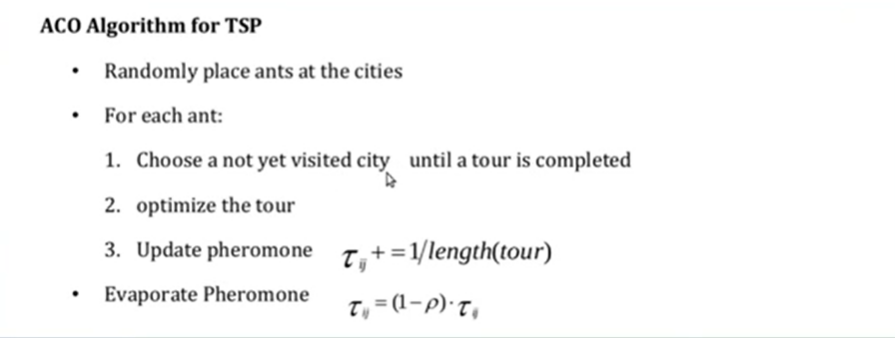

problem initialization (5 different random sol corresponding to 5 cities)

In [25]:
import numpy as np
from numpy import inf

#given values for the problems
#distance matrix between the cities
d = np.array([[0,10,12,11,14]
          ,[10,0,13,15,8]
          ,[12,13,0,9,14]
          ,[11,15,9,0,16]
          ,[14,8,14,16,0]])


iteration = 100
n_ants = 5
n_citys = 5

pheromone =1 for all cities at the beggining

In [26]:
# intialization part

m = n_ants
n = n_citys
e = .5         #evaporation rate
alpha = 1     #pheromone factor
beta = 2       #visibility factor

In [27]:
#calculating the visibility of the next city visibility(i,j)=1/d(i,j)
#if we can't decide with the pheremone, visibility uses distance so that ants can decide which city to choose based on the closer one

visibility = 1/d
visibility[visibility == inf ] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [28]:
#intializing pheromne present at the paths to the cities

#all ants start at location one
pheromne = .1*np.ones((m,n))

#intializing the rute of the ants with size rute(n_ants,n_citys+1) 
#note adding 1 because we want to come back to the source city

rute = np.ones((m,n+1))


In [29]:
pheromne = .1*np.ones((5,5))

In [30]:
pheromne

array([[0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1]])

In [31]:
for ite in range(iteration):
    
    rute[:,0] = 1          #initial starting and ending positon of every ants '1' i.e city '1'
    
    for i in range(m):
        
        temp_visibility = np.array(visibility)         #creating a copy of visibility
        
        #traverse for 4 cities (check last step to choose the remaining city which wasn't chosen)
        for j in range(n-1):
            #print(rute)
            
            combine_feature = np.zeros(5)     #intializing combine_feature array to zero
            cum_prob = np.zeros(5)            #intializing cummulative probability array to zeros
            
            cur_loc = int(rute[i,j]-1)        #current city of the ant
            
            #making the visibility of already visited cities as 0 (to not visit it again)
            temp_visibility[:,cur_loc] = 0     #making visibility of the current city as zero
            
            p_feature = np.power(pheromne[cur_loc,:],beta)         #calculating pheromne feature 
            v_feature = np.power(temp_visibility[cur_loc,:],alpha)  #calculating visibility feature
            
            p_feature = p_feature[:,np.newaxis]                     #adding axis to make a size[5,1]
            v_feature = v_feature[:,np.newaxis]                     #adding axis to make a size[5,1]
            
            #element by element multiplication
            combine_feature = np.multiply(p_feature,v_feature)     #calculating the combine feature
                        
            total = np.sum(combine_feature)                        #sum of all the feature
            
            probs = combine_feature/total   #finding probability of element probs(i) = comine_feature(i)/total
            
            cum_prob = np.cumsum(probs)     #calculating cummulative sum
            #print(cum_prob)

            r = np.random.random_sample()   #randon no in [0,1)
            #print(r)

            #pick the first element(city) from comulative prob that's greater than r
            city = np.nonzero(cum_prob>r)[0][0]+1       #finding the next city having probability higher then random(r) 
            #print(city)
            
            #adding the chosen city to the current route
            rute[i,j+1] = city              #adding city to route 
           

           #choose the remaining 5th city (one not visited yet)
        left = list(set([i for i in range(1,n+1)])-set(rute[i,:-2]))[0]     #finding the last untraversed city to route
        
        rute[i,-2] = left                   #adding untraversed city to route
       
    rute_opt = np.array(rute)               #intializing optimal route
    
    #calculating soution cost (route distance)
    dist_cost = np.zeros((m,1))             #intializing total_distance_of_tour with zero 
    
    for i in range(m):
        
        s = 0
        for j in range(n-1):
            
            s = s + d[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1]   #calcualting total tour distance
        
        dist_cost[i]=s                      #storing distance of tour for 'i'th ant at location 'i' 
       
    dist_min_loc = np.argmin(dist_cost)             #finding location of minimum of dist_cost
    dist_min_cost = dist_cost[dist_min_loc]         #finging min of dist_cost
    
    best_route = rute[dist_min_loc,:]               #intializing current traversed as best route

    #updating phermone
    pheromne = (1-e)*pheromne                       #evaporation of pheromne with (1-e)
    

    #phermone of best route is more
    for i in range(m):
        for j in range(n-1):
            dt = 1/dist_cost[i]
            pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] = pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] + dt   
            #updating the pheromne with delta_distance
            #delta_distance will be more with min_dist i.e adding more weight to that route  peromne

print('route of all the ants at the end :')
print(rute_opt)
print()
print('best path :',best_route)
print('cost of the best path',int(dist_min_cost[0]) + d[int(best_route[-2])-1,0])
   

            
            
            

route of all the ants at the end :
[[1. 4. 3. 2. 5. 1.]
 [1. 4. 3. 2. 5. 1.]
 [1. 4. 3. 2. 5. 1.]
 [1. 4. 3. 2. 5. 1.]
 [1. 4. 3. 2. 5. 1.]]

best path : [1. 4. 3. 2. 5. 1.]
cost of the best path 55
